# Water quilty classification 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import numpy as np
import pandas as pd
import random 
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
water=pd.read_csv('/Users/raneemalmutairi/Desktop/SDAIA/data/water.csv')
water

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [3]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [4]:
water.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.00,0.040,0.070,0.280,5.05
ammonia,7999.0,14.272857,8.881569,-0.08,6.560,14.130,22.130,29.84
arsenic,7999.0,0.161445,0.252590,0.00,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.00,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.00,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.00,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.00,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.00,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.00,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.00,0.000,0.220,0.610,1.00


# Data Visualization

In [5]:
water.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

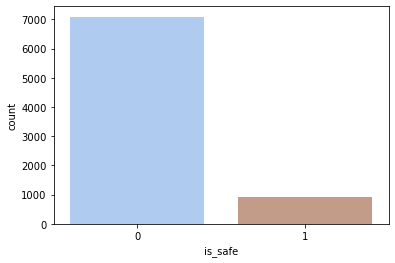

In [6]:
water['is_safe'].value_counts()
colours=["#A5CAFB","#CC997F"]
sns.countplot( data=water, x='is_safe',palette=colours);

In [7]:
water.shape

(7999, 21)

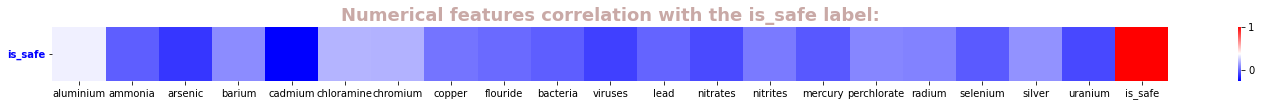

In [8]:
numeric_data = water.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["is_safe"], ascending=False).head(1), cmap="bwr")
plt.title("Numerical features correlation with the is_safe label:", weight="bold", fontsize=18, color="#c9a9a6")
plt.yticks(weight="bold", color="blue", rotation=0)

plt.show()

In [9]:
water[water['is_safe']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
aluminium,7087.000000,0.514576,1.130165,0.000000,0.030000,0.070000,0.110000,5.050000
ammonia,7087.000000,14.345147,8.910890,-0.080000,6.600000,14.340000,22.235000,29.840000
arsenic,7087.000000,0.172618,0.260080,0.000000,0.030000,0.060000,0.100000,1.050000
barium,7087.000000,1.528057,1.212073,0.000000,0.530000,1.100000,2.420000,4.940000
cadmium,7087.000000,0.046117,0.035633,0.000000,0.010000,0.040000,0.080000,0.130000
chloramine,7087.000000,2.004838,2.531301,0.000000,0.090000,0.410000,3.840000,8.680000
chromium,7087.000000,0.229520,0.264795,0.000000,0.040000,0.080000,0.400000,0.900000
copper,7087.000000,0.798932,0.656485,0.000000,0.090000,0.740000,1.390000,2.000000
flouride,7087.000000,0.770532,0.436326,0.000000,0.400000,0.760000,1.160000,1.500000
bacteria,7087.000000,0.322268,0.330657,0.000000,0.000000,0.220000,0.610000,1.000000


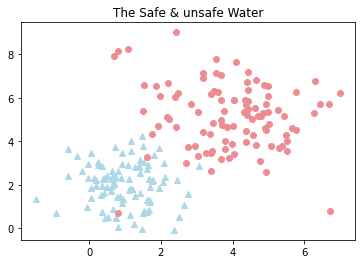

In [10]:
mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, 100)

mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, 100)

x = np.concatenate([x_1, x_2])
labels = np.array([0] * 100 + [1] *  100)

plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='#aed7e8')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = 'o', color='#ee8c94')
plt.title("The Safe & unsafe Water")
plt.show()

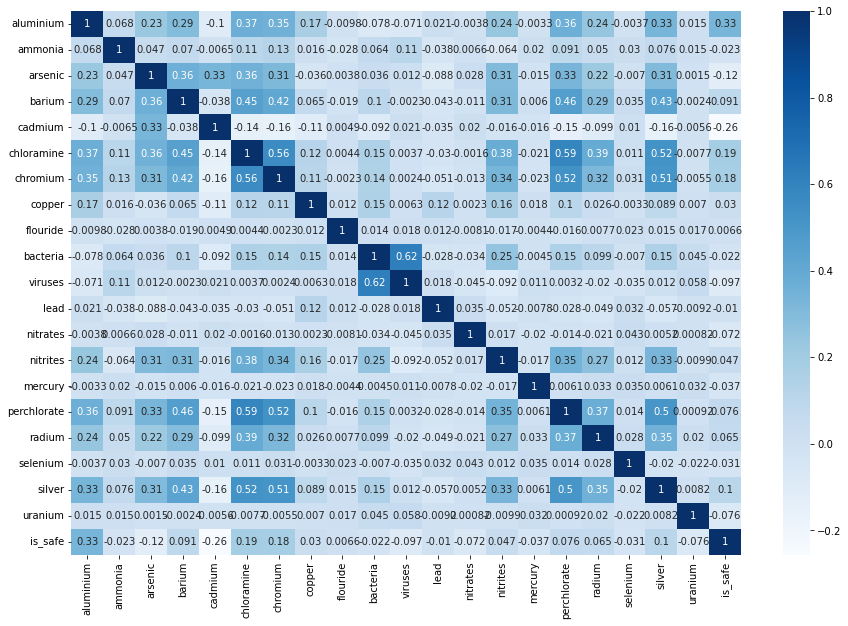

In [11]:
data=water.corr()
features=data.index
plt.figure(figsize=(15,10))

#Plotting heatmap with Seaborn

s=sns.heatmap(water[features].corr(),annot=True,cmap='Blues')

/var/folders/91/plb5k_p94vd60pcgn0jbw2m80000gn/T/ipykernel_70763/1608750122.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(water.corr(), dtype=np.bool))


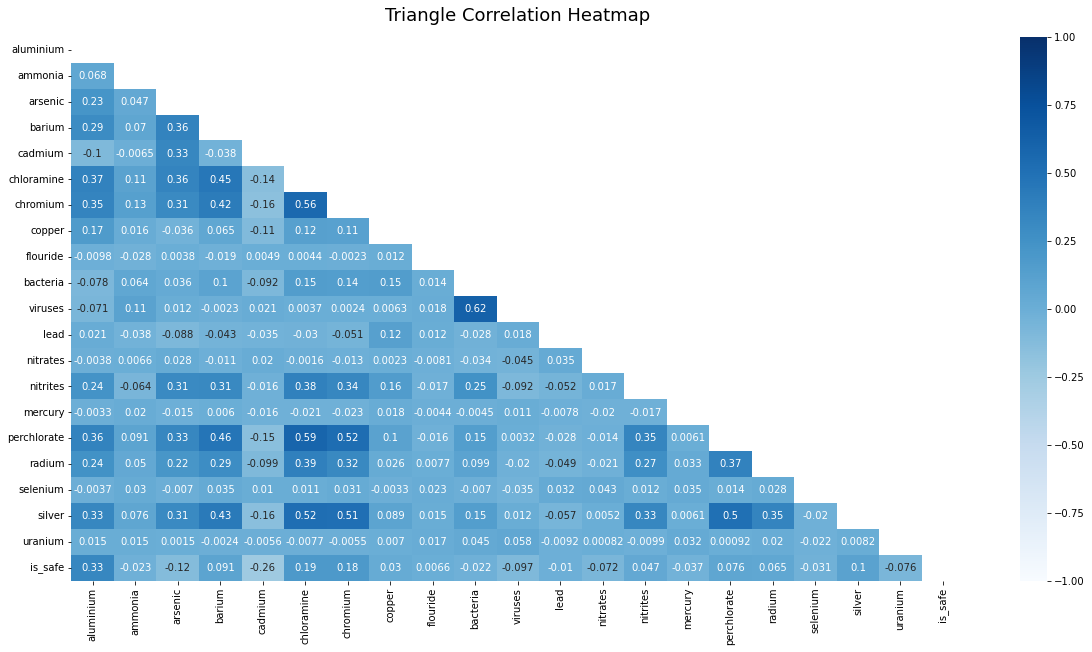

In [12]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(water.corr(), dtype=np.bool))
heatmap = sns.heatmap(water.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Text(0.8, 1500, 'Safe for Human consumption')

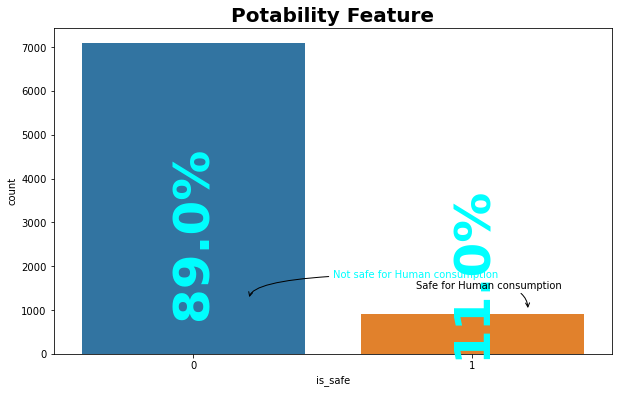

In [13]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=water, x='is_safe')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(water)*100,0)}%",
            ha='center', size=50, weight='bold', rotation=90, color='aqua')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), 
             arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='aqua')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->",
color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')


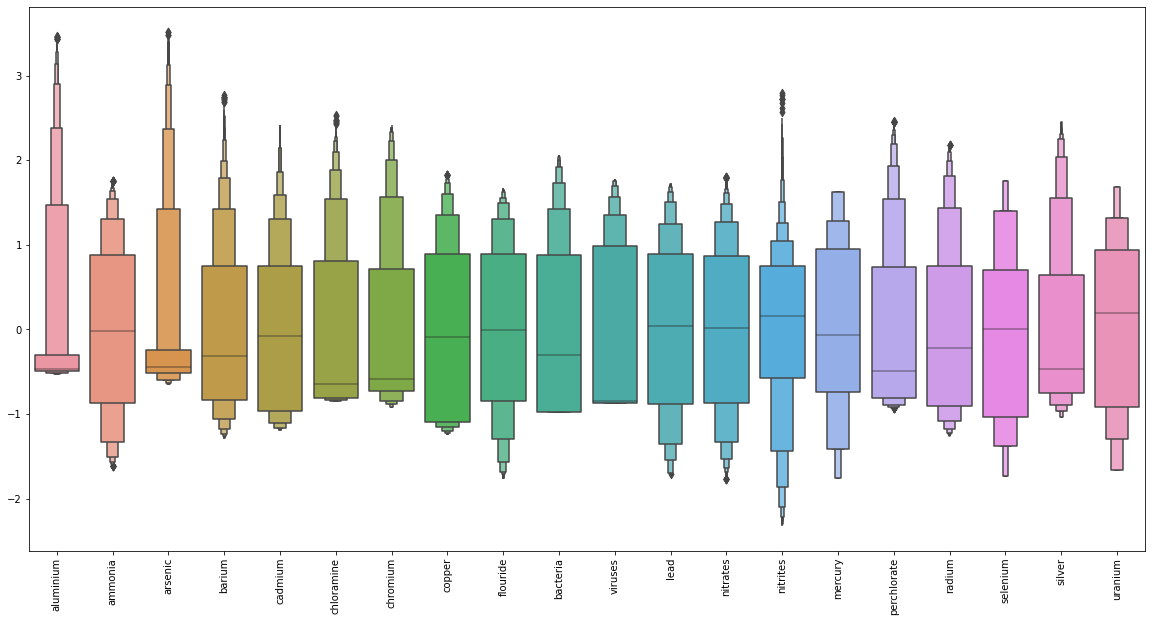

In [14]:
from sklearn import preprocessing
#assigning values to features as X and target as y
X=water.drop(["is_safe"],axis=1)
y=water["is_safe"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df)
plt.xticks(rotation=90)
plt.show()

We have to check the normlization of the data depending on the most effect on the is safe the label 

# Training and Testing 

In [15]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!
sns.set_style("whitegrid")
import xgboost as xgb
import pickle

In [16]:
DF = pd.read_csv('/Users/raneemalmutairi/Desktop/SDAIA/data/water.csv') 
DF

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [17]:
#water = ProfileReport(DF)
#water

In [18]:
DF['is_safe'].value_counts()


0    7087
1     912
Name: is_safe, dtype: int64

In [19]:
#SPLITTING TARGET VALUE:
y1 = DF.is_safe.reset_index(drop=True)
X1 = DF.drop(['is_safe'],axis=1,inplace=False).reset_index(drop=True)
print("data:\n",X1)
print("target:\n",y1)

data:
       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \

In [20]:
np.random.seed(10)
X_trainn,X_testt,y_trainn,y_testt = train_test_split(X1,y1,test_size=0.25, random_state=42)
X_trainn,X_testt,y_trainn,y_testt = X_trainn.reset_index(drop=True),X_testt.reset_index(drop=True),y_trainn.reset_index(drop=True),y_testt.reset_index(drop=True)

In [21]:
#Scaling columns that have values greater than 1
#to_scale = [col for col in X1.columns if X1[col].max()>1]

#sc = StandardScaler()

#scaled_train = sc.fit_transform(X_trainn[to_scale])
#scaled_train = pd.DataFrame(scaled_train,columns=to_scale)

#scaled_test = sc.fit_transform(X_testt[to_scale])
#scaled_test = pd.DataFrame(scaled_test,columns=to_scale)

#Replace the original columns with the scaled ones
#for col in scaled_train:
   # X_trainn[col] = scaled_train[col]
   # X_testt[col] = scaled_test[col]

Since our data is not balanced, we are going to try fitting them before balancing them to compare accuracy before and after balancing with 5 different models

# Models 

In [22]:
# we define 2 list that one of them save results of models other list save name of model
labelList0 = []
resultList0 = []
labelList01 = []
resultList01 = []
labelList2 = []
resultList2 = []

# 1st Logistic Regression.



In [23]:
lr0 = LogisticRegression(class_weight = {1 : 6, 0 : 1}, solver='liblinear')
lr0.fit(X_trainn,y_trainn)
print("Logistic Regression Test score=",lr0.score(X_testt,y_testt))
print("Logistic Regression Train score=",lr0.score(X_trainn,y_trainn))

y_pred_lr0 = lr0.predict(X_testt)

recall0 = recall_score(y_testt, y_pred_lr0, average="binary")

labelList0.append("Log_Reg")
resultList0.append(lr0.score(X_testt,y_testt))

labelList01.append("Log_Reg")
resultList01.append(recall0)



recall0

Logistic Regression Test score= 0.8485
Logistic Regression Train score= 0.8446407734622438


0.689795918367347

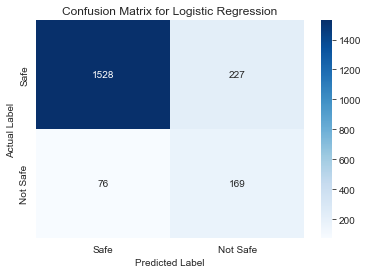

In [24]:
predictions = lr0.predict(X_testt)
cm=confusion_matrix(y_testt, predictions)
class_label = ["Safe", "Not Safe"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 2st Random Forest.


In [25]:
rf0 = RandomForestClassifier(class_weight = {1 : 6, 0 : 1},n_estimators=100,random_state = 1)
rf0.fit(X_trainn, y_trainn)
print("Random Forest Train score: ",rf0.score(X_trainn,y_trainn))
print("Random Forest Test score: ",rf0.score(X_testt,y_testt))
y_pred_rf0 = rf0.predict(X_testt)

Random Forest Train score:  1.0
Random Forest Test score:  0.957


In [26]:
# classification report for Random Forest 
print(classification_report(y_testt, y_pred_rf0, digits=3, zero_division = 1))
acc_rf = accuracy_score(y_testt, y_pred_rf0)
recall_rf = recall_score(y_testt, y_pred_rf0, average="binary")
print("ACCURACY:",accuracy_score(y_testt, y_pred_rf0))
print("RECALL:",recall_score(y_testt, y_pred_rf0, average="binary"))

              precision    recall  f1-score   support

           0      0.958     0.994     0.976      1755
           1      0.944     0.690     0.797       245

    accuracy                          0.957      2000
   macro avg      0.951     0.842     0.887      2000
weighted avg      0.957     0.957     0.954      2000

ACCURACY: 0.957
RECALL: 0.689795918367347


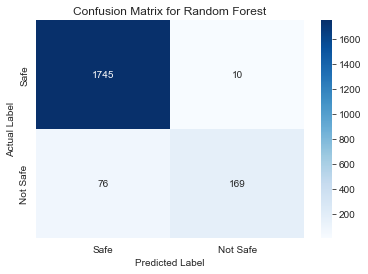

In [27]:
predictions = rf0.predict(X_testt)
cm=confusion_matrix(y_testt, predictions)
class_label = ["Safe", "Not Safe"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 3rd K-Nearest Neighbor

In [28]:
knn0 = KNeighborsClassifier( n_neighbors=5) #n_neighbors = k
knn0.fit(X_trainn,y_trainn)
print("K-Nearest Neighbor Test score: ",knn0.score(X_testt,y_testt))
print("K-Nearest Neighbor Train score: ",knn0.score(X_trainn,y_trainn))
y_pred_knn0 = knn0.predict(X_testt)
labelList0.append("KNN")
resultList0.append(knn0.score(X_testt,y_testt))
recall = recall_score(y_testt, y_pred_knn0, average="binary")
labelList01.append("KNN")
resultList01.append(recall)

K-Nearest Neighbor Test score:  0.864
K-Nearest Neighbor Train score:  0.9093182197032839


In [29]:
# classification report for K-Nearest Neighbor.
print(classification_report(y_testt, y_pred_lr0, digits=3, zero_division = 1))
acc_lr = accuracy_score(y_testt, y_pred_lr0)
recall_lr = recall_score(y_testt, y_pred_lr0, average="binary")
print("ACCURACY:",accuracy_score(y_testt, y_pred_lr0))
print("RECALL:",recall_score(y_testt, y_pred_lr0, average="binary"))

              precision    recall  f1-score   support

           0      0.953     0.871     0.910      1755
           1      0.427     0.690     0.527       245

    accuracy                          0.849      2000
   macro avg      0.690     0.780     0.719      2000
weighted avg      0.888     0.849     0.863      2000

ACCURACY: 0.8485
RECALL: 0.689795918367347


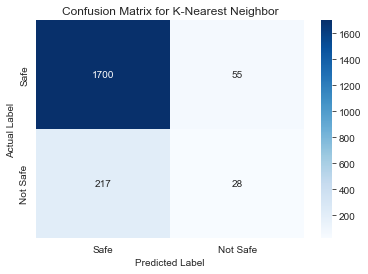

In [30]:
predictions = knn0.predict(X_testt)
cm=confusion_matrix(y_testt, predictions)
class_label = ["Safe", "Not Safe"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.Blues)
plt.title("Confusion Matrix for K-Nearest Neighbor")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 4th Naiive Bayes.


In [31]:
nb0 = GaussianNB()
GaussianNB?
nb0.fit(X_trainn,y_trainn)
print("Naive Bayes Test score: ",nb0.score(X_testt,y_testt))
print("Naive Bayes Train score: ",nb0.score(X_trainn,y_trainn))
y_pred_nb0 = nb0.predict(X_testt)
labelList0.append("Naive-B")
resultList0.append(nb0.score(X_testt,y_testt))
recall = recall_score(y_testt, y_pred_nb0, average="binary")
labelList01.append("Naive-B")
resultList01.append(recall)

Naive Bayes Test score:  0.8525
Naive Bayes Train score:  0.851808634772462


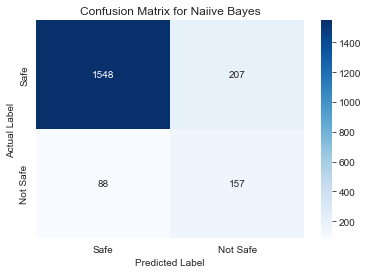

In [32]:
predictions = nb0.predict(X_testt)
cm=confusion_matrix(y_testt, predictions)
class_label = ["Safe", "Not Safe"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naiive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 5th Decision Tree.

In [33]:
dt0 = DecisionTreeClassifier(class_weight = {1 : 6, 0 : 1})
dt0.fit(X_trainn,y_trainn)
print("Decison Tree Train score : ",dt0.score(X_trainn,y_trainn))
print("Decison Tree Test score : ",dt0.score(X_testt,y_testt))
y_pred_dt0 = dt0.predict(X_testt)
labelList0.append("D-Tree")
resultList0.append(dt0.score(X_testt,y_testt))
recall = recall_score(y_testt, y_pred_dt0, average="binary")
labelList01.append("D-Tree")
resultList01.append(recall)




Decison Tree Train score :  1.0
Decison Tree Test score :  0.9565


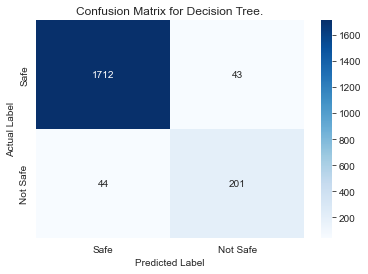

In [34]:
predictions = dt0.predict(X_testt)
cm=confusion_matrix(y_testt, predictions)
class_label = ["Safe", "Not Safe"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree.")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 6th Adapttive boost 

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean
model = AdaBoostClassifier( )
cv = RepeatedStratifiedKFold(n_splits=15,n_repeats=10, random_state=6)
n_score = cross_val_score(model,X_trainn,y_trainn,cv=cv, scoring='accuracy', n_jobs=-1)
print('Accuracy = %0.2f percent' %(mean(n_score)*100))

Accuracy = 92.98 percent


In [36]:
model.fit(X_trainn,y_trainn)

AdaBoostClassifier()

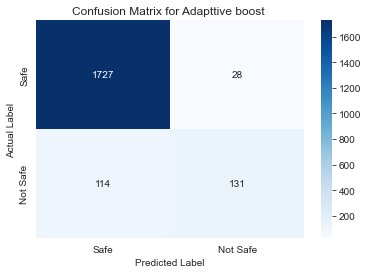

In [37]:
predictions = model.predict(X_testt)
cm=confusion_matrix(y_testt, predictions)
class_label = ["Safe", "Not Safe"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Adapttive boost ")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 7th Support Vector Machine SVM

In [38]:
# SVM model
svm0 = SVC(class_weight = {1 : 6, 0 : 1},random_state=3)
svm0.fit(X_trainn,y_trainn)
print("svm Train score : ",svm0.score(X_testt,y_testt))
print("svm Test score: ",svm0.score(X_testt,y_testt))
y_pred_svm0 = svm0.predict(X_testt)
# adding result and label to lists
labelList0.append("SVM")
resultList0.append(svm0.score(X_testt,y_testt))
recall = recall_score(y_testt, y_pred_svm0, average="binary")
labelList01.append("SVM")
resultList01.append(recall)

svm Train score :  0.8075
svm Test score:  0.8075


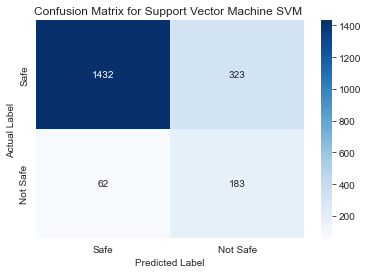

In [39]:
predictions = svm0.predict(X_testt)
cm=confusion_matrix(y_testt, predictions)
class_label = ["Safe", "Not Safe"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Support Vector Machine SVM ")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 8th XGBOST

In [53]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [55]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=3,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.20,
                        min_child_weight=3,
                        colsample_bytree=.20
                       )

eval_set=[(X_trainn,y_trainn)]
fit_model = gbm.fit( 
                    X_trainn,y_trainn ,
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=30,
                    verbose=False
                   )


print(" the accurecy of xgbost is")
accuracy_score(y_testt, gbm.predict(X_testt, ntree_limit=gbm.best_ntree_limit))

/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


 the accurecy of xgbost is


/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.9455

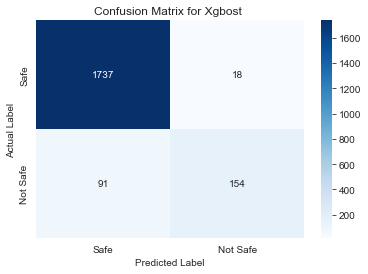

In [57]:
predictions = gbm.predict(X_testt)
cm=confusion_matrix(y_testt, predictions)
class_label = ["Safe", "Not Safe"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Xgbost ")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Visulization of Sum all 

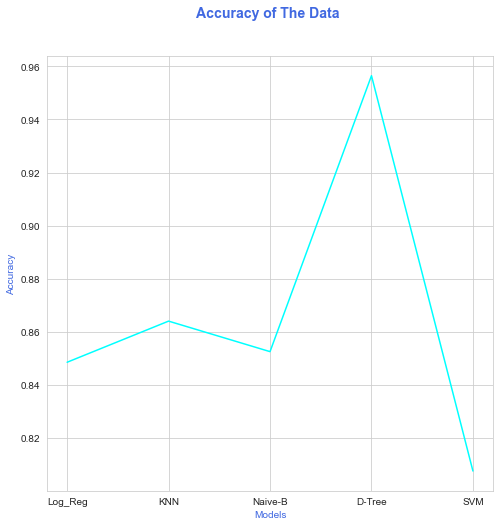

In [40]:
plt.figure(figsize=(8,8))
plt.plot(labelList0,resultList0 ,color="aqua")
plt.title("Accuracy of The Data \n\n",fontsize=14,  fontweight='bold', color="royalblue")
plt.xlabel("Models", color="royalblue")
plt.ylabel("Accuracy",color="royalblue")
plt.show()

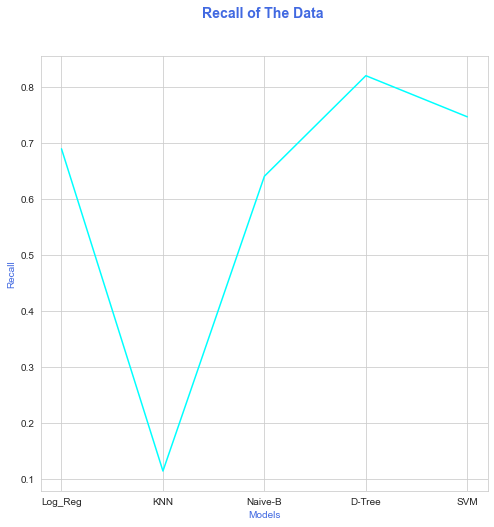

In [42]:
plt.figure(figsize=(8,8))
plt.plot(labelList01,resultList01 ,color="aqua")
plt.title("Recall of The Data \n\n",fontsize=14,  fontweight='bold', color="royalblue")
plt.xlabel("Models",color="royalblue")
plt.ylabel("Recall",color="royalblue")
plt.show()